In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/covid-variants.csv')

In [ ]:
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971
여기에 어떻게 데이터셋 올리는지 나와있다. 참조하도록

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
variant_names = df['variant'].unique()
variant_names


array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

24가지의 Variant가 존재한다는 것을 알수있고, 다음과 같은 이름들이 있단 것을 알수 있었다.

 
# **Tracking the progression of the new omicron COVID-19 Variant**

**The data** 
*   location - this is the country for which the variant's information is provided
*   date - date for the data entry; 
*   variant - this is the variant corresponding to this data entry


*   num_sequences = total confirmed covid cases for that particular variant on that day in that location

* perc_sequences = num_sequences / num_sequences_total

* num_sequences_total = total covid tests performed on that day in that location









# What is the most popular variant? 

In [ ]:
virus_distribution = pd.pivot_table(df,'num_sequences','location','variant',aggfunc='sum')
var = ['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who']

for i in var: 
  print(f'Top 5 countries with variant {i} :\n {virus_distribution[i].sort_values(ascending=False)[:5]}\n ')

Top 5 countries with variant Alpha :
 location
United Kingdom    262781
United States     239829
Germany           104138
Sweden             68608
Denmark            63798
Name: Alpha, dtype: int64
 
Top 5 countries with variant B.1.1.277 :
 location
Denmark           545
Norway            242
United Kingdom    183
Poland             33
Iceland            30
Name: B.1.1.277, dtype: int64
 
Top 5 countries with variant B.1.1.302 :
 location
Sweden            279
Denmark           121
Norway             37
Latvia             26
United Kingdom     21
Name: B.1.1.302, dtype: int64
 
Top 5 countries with variant B.1.1.519 :
 location
United States    13136
Mexico            7418
Canada            1393
Germany            195
Denmark            187
Name: B.1.1.519, dtype: int64
 
Top 5 countries with variant B.1.160 :
 location
France            6054
Switzerland       5537
Denmark           5299
Canada            2897
United Kingdom    2882
Name: B.1.160, dtype: int64
 
Top 5 countries with v

# Which country is the highest populated country with the Omicron Variant?

In [ ]:
df['location'].value_counts()

Mexico            1080
Belgium           1080
Bangladesh        1080
France            1080
United Kingdom    1080
                  ... 
Montenegro         384
Monaco             360
Benin              336
Fiji               336
Brunei             240
Name: location, Length: 121, dtype: int64

In [ ]:
df.describe(include = 'object')

,location,date,variant
count,100416,100416,100416
unique,121,45,24
top,Mexico,2021-02-08,Alpha
freq,1080,2688,4184


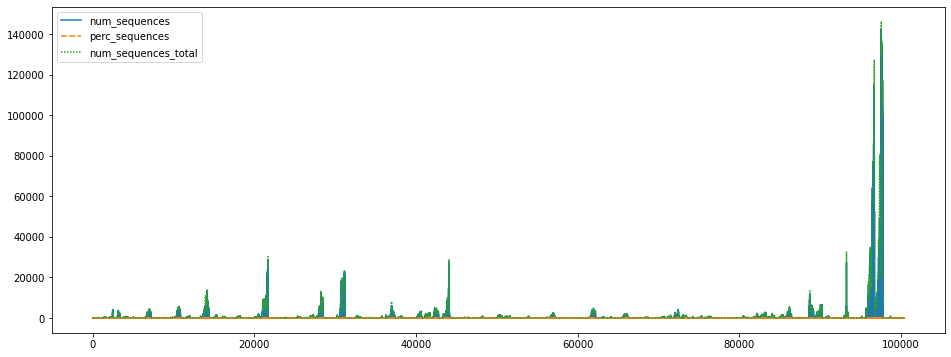

In [ ]:
plt.figure(figsize = (16,6))
sns.lineplot(data = df)